
## ***Job Recommendation System***

### ***Summary***

***Business and Data Understanding***

The objective is to provide job recommendations based on a given job title, thus addressing the need for users to discover related opportunities.

The dataset used in this project is the 'Combined Jobs Final' dataset obtained from Kaggle-[https://www.kaggle.com/datasets/kandij/job-recommendation-datasets] , which contains various job listings with information such as job title, company, location, and job description. 

The data is well-suited for the problem as it includes descriptive job details that can be leveraged to calculate similarities.

***Data Preparation***

The data was preprocessed by removing missing values from critical columns such as 'Title' and 'Job Description'. 

The TF-IDF Vectorizer from Scikit-Learn was used to convert the textual data into numerical form for modeling purposes.

***Modeling***

The modeling approach uses a content-based recommendation system built using the TF-IDF Vectorizer and Knearest Neighbours with a `cosine_similariry metric`. 

The `cosine_similarity` function was used to find related job listings.

This technique is appropriate as it measures text similarity effectively for recommendation.

***Evaluation*** 

The recommendation system was qualitatively evaluated by testing different input job titles. 

Given the unsupervised nature of this content-based recommender, metrics such as accuracy are less applicable in this case.

Instead, similarity-based relevance and user feedback were used for validation.


In [51]:
#Importing  libraries

import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
import pickle
from flask import Flask, request, jsonify



### ***The Data*** 


The Combined  Jobs Final dataset contains 84,090 rows and 23 columns. 

The columns are: 

**1. Job.ID:** Unique identifier for each job listing.

**2. Provider:** Platform or source of the job listing.

**3. Status:** Current state of the job (e.g., open, closed).

**4. Slug:** URL-friendly string for the job.

**5. Title:** Job title or role and the @ refers to the company or location to where the job is at

**6. Position:** Job position type.

**7. Company:** Name of the hiring company.

**8. City:** City where the job is located.

**9. State.Name:** Name of the state where the job is located.

**10. State.Code:** Abbreviation or code for the state.

**11. Address:** Detailed address of the job location.

**12. Latitude:** Latitude coordinate of the job location.

**13. Longitude:** Longitude coordinate of the job location.

**14. Industry:** Industry related to the job.

**15. Job.Description:** Detailed description of the job role.

**16. Requirements:** Qualifications and skills required for the job.

**17. Salary:** Salary offered for the position.

**18. Listing.Start:** Date the job listing became active.

**19. Listing.End:** Date the job listing ends or expires.

**20. Employment.Type:** Type of employment (e.g., full-time, part-time).

**21. Education.Required:** Educational qualifications required.

**22. Created.At:** Timestamp when the listing was created.

**23. Updated.At:** Timestamp of the last update made to the listing.

In [52]:
#loading the data
combined_jobs = pd.read_csv('Combined_Jobs_Final.csv')
combined_jobs.head() #preview the data


,Job.ID,Provider,Status,Slug,Title,Position,Company,City,State.Name,State.Code,...,Industry,Job.Description,Requirements,Salary,Listing.Start,Listing.End,Employment.Type,Education.Required,Created.At,Updated.At
0,111,1,open,palo-alto-ca-tacolicious-server,Server @ Tacolicious,Server,Tacolicious,Palo Alto,California,CA,...,Food and Beverages,Tacolicious' first Palo Alto store just opened...,NaN,8.00,NaN,NaN,Part-Time,NaN,2013-03-12 02:08:28 UTC,2014-08-16 15:35:36 UTC
1,113,1,open,san-francisco-ca-claude-lane-kitchen-staff-chef,Kitchen Staff/Chef @ Claude Lane,Kitchen Staff/Chef,Claude Lane,San Francisco,California,CA,...,Food and Beverages,\r\n\r\nNew French Brasserie in S.F. Financia...,NaN,0.00,NaN,NaN,Part-Time,NaN,2013-04-12 08:36:36 UTC,2014-08-16 15:35:36 UTC
2,117,1,open,san-francisco-ca-machka-restaurants-corp-barte...,Bartender @ Machka Restaurants Corp.,Bartender,Machka Restaurants Corp.,San Francisco,California,CA,...,Food and Beverages,We are a popular Mediterranean wine bar and re...,NaN,11.00,NaN,NaN,Part-Time,NaN,2013-07-16 09:34:10 UTC,2014-08-16 15:35:37 UTC
3,121,1,open,brisbane-ca-teriyaki-house-server,Server @ Teriyaki House,Server,Teriyaki House,Brisbane,California,CA,...,Food and Beverages,● Serve food/drinks to customers in a profess...,NaN,10.55,NaN,NaN,Part-Time,NaN,2013-09-04 15:40:30 UTC,2014-08-16 15:35:38 UTC
4,127,1,open,los-angeles-ca-rosa-mexicano-sunset-kitchen-st...,Kitchen Staff/Chef @ Rosa Mexicano - Sunset,Kitchen Staff/Chef,Rosa Mexicano - Sunset,Los Angeles,California,CA,...,Food and Beverages,"Located at the heart of Hollywood, we are one ...",NaN,10.55,NaN,NaN,Part-Time,NaN,2013-07-17 15:26:18 UTC,2014-08-16 15:35:40 UTC


In [53]:
#preview column for better understanding
combined_jobs['Slug'].head()

0                      palo-alto-ca-tacolicious-server
1      san-francisco-ca-claude-lane-kitchen-staff-chef
2    san-francisco-ca-machka-restaurants-corp-barte...
3                    brisbane-ca-teriyaki-house-server
4    los-angeles-ca-rosa-mexicano-sunset-kitchen-st...
Name: Slug, dtype: object

Slug is like a link to the job location

In [54]:
#preview column for better understanding
combined_jobs['Title'].head()

0                           Server @ Tacolicious
1               Kitchen Staff/Chef @ Claude Lane
2           Bartender @ Machka Restaurants Corp.
3                        Server @ Teriyaki House
4    Kitchen Staff/Chef @ Rosa Mexicano - Sunset
Name: Title, dtype: object

The @ after the title shows the job location

In [55]:



pd.reset_option('display.max_colwidth')#resetting to max column width


combined_jobs['Job.Description'].head(1) # display the first job description



0    Tacolicious' first Palo Alto store just opened...
Name: Job.Description, dtype: object

Job decription is what the recruit will entirely like the first example in our data is:

*Tacolicious' first Palo Alto store just opened recently, and we are hiring! If you love tacos, you will love working at our restaurant!* 

*● Serve food/drinks to customers in a professional manner*

*● Act as a cashier when needed*

*● Clean up the dining space*

*● Train the new staff*

*Name: Job.Description, dtype: object*

In [56]:
combined_jobs.shape # checking data shape

(84090, 23)

In [57]:
combined_jobs.columns # inspecting the columns

Index(['Job.ID', 'Provider', 'Status', 'Slug', 'Title', 'Position', 'Company',
       'City', 'State.Name', 'State.Code', 'Address', 'Latitude', 'Longitude',
       'Industry', 'Job.Description', 'Requirements', 'Salary',
       'Listing.Start', 'Listing.End', 'Employment.Type', 'Education.Required',
       'Created.At', 'Updated.At'],
      dtype='object')

In [58]:
combined_jobs.info() # checking data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84090 entries, 0 to 84089
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Job.ID              84090 non-null  int64  
 1   Provider            84090 non-null  int64  
 2   Status              84090 non-null  object 
 3   Slug                84090 non-null  object 
 4   Title               84090 non-null  object 
 5   Position            84090 non-null  object 
 6   Company             81819 non-null  object 
 7   City                83955 non-null  object 
 8   State.Name          83919 non-null  object 
 9   State.Code          83919 non-null  object 
 10  Address             36 non-null     object 
 11  Latitude            84090 non-null  float64
 12  Longitude           84090 non-null  float64
 13  Industry            267 non-null    object 
 14  Job.Description     84034 non-null  object 
 15  Requirements        0 non-null      float64
 16  Sala

In [59]:
combined_jobs.describe() # checking data statistics

,Job.ID,Provider,Latitude,Longitude,Requirements,Salary
count,84090.000000,84090.000000,84090.000000,84090.000000,0.0,229.000000
mean,258490.774979,1.997063,37.967134,-92.151257,NaN,7.832227
std,52653.870401,0.056272,5.458651,17.412900,NaN,7.566016
min,3.000000,1.000000,-34.887672,-166.539760,NaN,0.000000
25%,250415.250000,2.000000,34.072600,-104.249780,NaN,0.000000
50%,271452.500000,2.000000,39.218300,-86.941440,NaN,8.000000
75%,293672.750000,2.000000,41.598965,-79.997460,NaN,10.550000
max,319174.000000,3.000000,71.294700,144.885800,NaN,58.000000


#### ***Data Cleaning***

In [60]:
#checking the percentage of null values in every column
combined_jobs.isnull().sum().sort_values(ascending=False) / len(combined_jobs) * 100

Requirements          100.000000
Address                99.957189
Salary                 99.727673
Industry               99.682483
Company                 2.700678
Listing.Start           0.812225
Education.Required      0.317517
State.Name              0.203354
State.Code              0.203354
Listing.End             0.198597
City                    0.160542
Job.Description         0.066595
Employment.Type         0.011892
Job.ID                  0.000000
Created.At              0.000000
Latitude                0.000000
Longitude               0.000000
Provider                0.000000
Position                0.000000
Title                   0.000000
Slug                    0.000000
Status                  0.000000
Updated.At              0.000000
dtype: float64

In [61]:
#Dropping columns with more than 50% missing values
columns_to_drop = ['Requirements', 'Address', 'Salary', 'Industry', 'Created.At', 'Updated.At']

combined_jobs = combined_jobs.drop(columns=columns_to_drop)


#Using Mode to replace missing values
for column in ['Listing.Start', 'Education.Required', 'State.Code', 'State.Name', 
               'Listing.End', 'City', 'Employment.Type']:
    combined_jobs[column].fillna(combined_jobs[column].mode()[0], inplace=True)


#Dropping rows with missing values
combined_jobs = combined_jobs.dropna(subset=['Company', 'Job.Description'])

C:\Users\FLEX 5\AppData\Local\Temp\ipykernel_18312\2473218848.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_jobs[column].fillna(combined_jobs[column].mode()[0], inplace=True)


In [62]:
combined_jobs.isnull().sum() # Reconfirming that there are no null values

Job.ID                0
Provider              0
Status                0
Slug                  0
Title                 0
Position              0
Company               0
City                  0
State.Name            0
State.Code            0
Latitude              0
Longitude             0
Job.Description       0
Listing.Start         0
Listing.End           0
Employment.Type       0
Education.Required    0
dtype: int64

In [63]:
#checking duplicated values esp for JobID
combined_jobs.duplicated().sum()

0

In [64]:
combined_jobs.head() # previewing the data

,Job.ID,Provider,Status,Slug,Title,Position,Company,City,State.Name,State.Code,Latitude,Longitude,Job.Description,Listing.Start,Listing.End,Employment.Type,Education.Required
0,111,1,open,palo-alto-ca-tacolicious-server,Server @ Tacolicious,Server,Tacolicious,Palo Alto,California,CA,37.443346,-122.161170,Tacolicious' first Palo Alto store just opened...,03/03/2015,01/04/2015,Part-Time,Not Specified
1,113,1,open,san-francisco-ca-claude-lane-kitchen-staff-chef,Kitchen Staff/Chef @ Claude Lane,Kitchen Staff/Chef,Claude Lane,San Francisco,California,CA,37.789830,-122.404268,\r\n\r\nNew French Brasserie in S.F. Financia...,03/03/2015,01/04/2015,Part-Time,Not Specified
2,117,1,open,san-francisco-ca-machka-restaurants-corp-barte...,Bartender @ Machka Restaurants Corp.,Bartender,Machka Restaurants Corp.,San Francisco,California,CA,37.795597,-122.402963,We are a popular Mediterranean wine bar and re...,03/03/2015,01/04/2015,Part-Time,Not Specified
3,121,1,open,brisbane-ca-teriyaki-house-server,Server @ Teriyaki House,Server,Teriyaki House,Brisbane,California,CA,37.685073,-122.400275,● Serve food/drinks to customers in a profess...,03/03/2015,01/04/2015,Part-Time,Not Specified
4,127,1,open,los-angeles-ca-rosa-mexicano-sunset-kitchen-st...,Kitchen Staff/Chef @ Rosa Mexicano - Sunset,Kitchen Staff/Chef,Rosa Mexicano - Sunset,Los Angeles,California,CA,34.073384,-118.460439,"Located at the heart of Hollywood, we are one ...",03/03/2015,01/04/2015,Part-Time,Not Specified


In [65]:
#Dropping columns with unimportant information
combined_jobs = combined_jobs.drop(columns=['Listing.End', 'Listing.Start', 'Latitude', 'Longitude', 
                                            'State.Code', 'Status', 'Title', 'Slug'])

In [66]:
combined_jobs.shape # checking data shape of the cleaned dataset

(81766, 9)

In [68]:
combined_jobs['Employment.Type'].value_counts() # checking employment type counts

Employment.Type
Part-Time              32160
Seasonal/Temp          27389
Full-Time/Part-Time    16759
Per Diem                4502
Intern                   904
Full-Time                 37
Contract                  14
Temporary/seasonal         1
Name: count, dtype: int64

In [69]:
combined_jobs.loc[:, "Employment.Type"] = combined_jobs["Employment.Type"].replace(["Temporary/seasonal"], "Seasonal/Temp") # replacing "Temporary/seasonal" with "Seasonal/Temp"

In [70]:
combined_jobs['Employment.Type'].value_counts() # reconfirming changes

Employment.Type
Part-Time              32160
Seasonal/Temp          27390
Full-Time/Part-Time    16759
Per Diem                4502
Intern                   904
Full-Time                 37
Contract                  14
Name: count, dtype: int64

In [71]:
combined_jobs['Education.Required'].value_counts() # checking education required counts

Education.Required
Not Specified          60919
High School Diploma    13704
Associate Degree        3381
Bachelor's Degree       2753
Master's Degree         1009
Name: count, dtype: int64

In [72]:
combined_jobs['Provider'].value_counts() # checking provider counts

Provider
2    81499
1      257
3       10
Name: count, dtype: int64

In [73]:
combined_jobs['Company'].value_counts() # checking company counts

Company
Accountemps                                                    12471
OfficeTeam                                                     11423
BAYADA HOME HEALTH CARE                                         2194
Vector Marketing                                                1681
Macy's                                                          1625
                                                               ...  
Carriage Court of Hilliard, A Good Neighbor Care Community         1
Heartis of Cleburne, a Good Neighbor Care managed community        1
Shawnee Gardens Healthcare and Rehabilitation Center, LLC          1
Lehigh University                                                  1
National Japanese American Historical Society                      1
Name: count, Length: 8334, dtype: int64

In [74]:
combined_jobs['Position'].value_counts() # checking position counts

Position
Administrative Assistant                                       1392
Customer Service Representative                                1270
Accounts Payable Clerk                                          968
Accounting Clerk                                                950
Sales Representative / Sales Associate ( Entry Level )          917
                                                               ... 
Immediate Need Full Charge Bookkeeper                             1
Accounts Receivable Clerk needed for a fortune 500 company!       1
SOX Auditor Clerk                                                 1
Proactive Accounts Receivable Clerk Needed Immediatley!           1
Book Keeper                                                       1
Name: count, Length: 35325, dtype: int64

In [75]:
combined_jobs['State.Name'].value_counts() # checking state name counts

State.Name
California              10761
Florida                  5465
Texas                    5313
Pennsylvania             4857
Illinois                 3960
Ohio                     3938
New York                 3122
New Jersey               2757
Minnesota                2414
Washington               2389
Indiana                  2351
Massachusetts            2195
Michigan                 2144
North Carolina           1937
Wisconsin                1859
Virginia                 1760
Arizona                  1700
Tennessee                1672
Maryland                 1651
Georgia                  1641
Colorado                 1633
Connecticut              1365
Missouri                 1344
Iowa                     1146
Oregon                   1088
Kentucky                 1081
Nevada                    987
South Carolina            893
Kansas                    798
Louisiana                 746
Utah                      674
Alabama                   583
New Hampshire             570

#### ***Exploratory Data Analysis***

***Univariate Analysis***

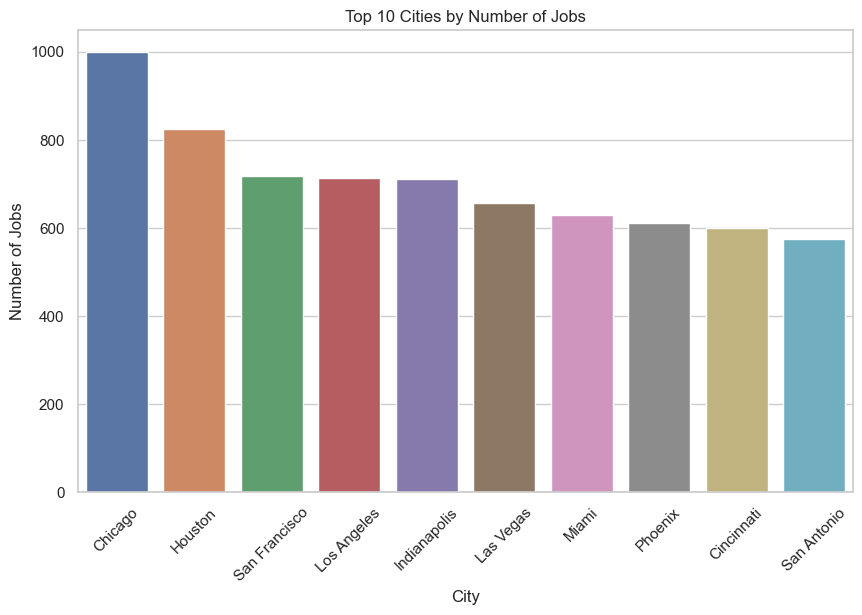

In [76]:
# Plotting top 10 cities with the highest number of job listings
plt.figure(figsize=(10, 6))

# Get the top 10 cities
top_10_cities = combined_jobs['City'].value_counts().nlargest(10).index

# Filter the dataset for top 10 cities
sns.countplot(data=combined_jobs[combined_jobs['City'].isin(top_10_cities)], 
              x='City', 
              order=top_10_cities)

plt.title('Top 10 Cities by Number of Jobs')
plt.xlabel('City')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)
plt.show()


Chicago and Houston have the most job listings

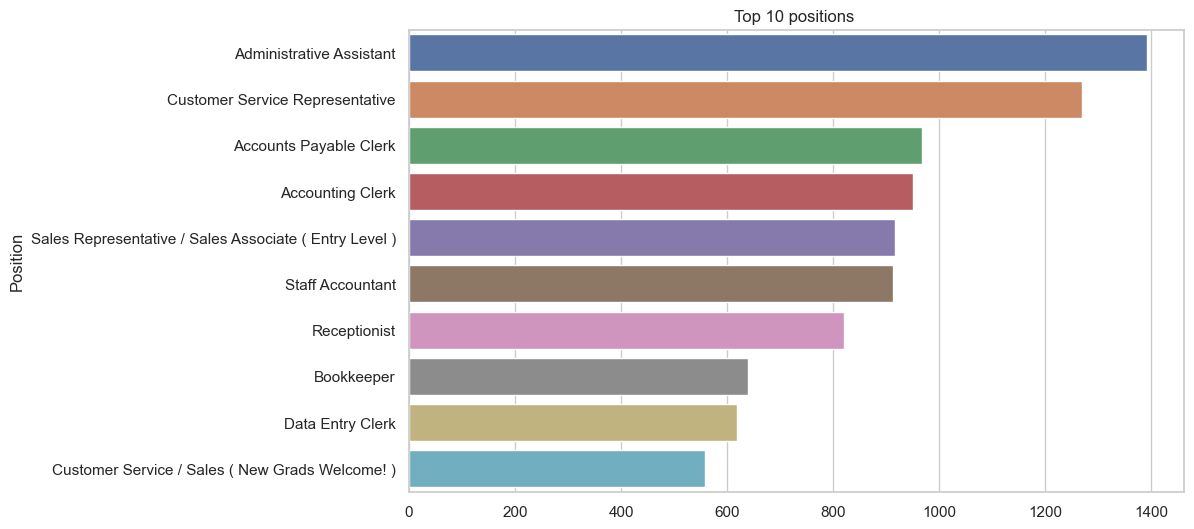

In [77]:
#top 10 positions  available
top_positions = combined_jobs['Position'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_positions.index, x=top_positions.values)
plt.title('Top 10 positions ')
plt.show()

Most Jobs are Admin jobs

In [78]:
#Creating a function to further explore and visualize the categorical features in the dataset
def plot_categorical_distribution(df, column_name, top_n=10, show_counts=True, show_percentages=True):
    
    # To Check if the column exists in the DataFrame
    if column_name not in df.columns:
        print(f"Column '{column_name}' does not exist in the DataFrame.")
        return
    
    # To Check if the column is categorical
    if not pd.api.types.is_object_dtype(df[column_name]) and not pd.api.types.is_categorical_dtype(df[column_name]):
        print(f"Column '{column_name}' is not a categorical data type.")
        return
    
    # Dropping missing values
    data = df[column_name].dropna()
    
    # Calculating value counts
    counts = data.value_counts()
    
    # To Handle  high-cardinality by selecting top_n categories
    if len(counts) > top_n:
        top_categories = counts.nlargest(top_n)
        other_count = counts.sum() - top_categories.sum()
        counts = pd.concat([top_categories, pd.Series({'Other': other_count})])
    
    # Calculating percentages
    percentages = (counts / counts.sum()) * 100
    
    
    plot_df = pd.DataFrame({
        'Category': counts.index,
        'Count': counts.values,
        'Percentage': percentages.values
    })  #Create a DataFrame for plotting
    
  
    sns.set(style="whitegrid")
    
    plt.figure(figsize=(10, 6))
    
    barplot = sns.barplot(x='Count', y='Category', data=plot_df, palette='viridis')
    
    # Adding count labels and percantages
    if show_counts:
        for index, row in plot_df.iterrows():
            barplot.text(row['Count'] + plot_df['Count'].max()*0.01, index, 
                        f"{row['Count']}", color='black', va="center")
    
   
    if show_percentages:
        for index, row in plot_df.iterrows():
            barplot.text(row['Count'] + plot_df['Count'].max()*0.15, index, 
                        f"{row['Percentage']:.2f}%", color='black', va="center")
    
    
    plt.title(f'Distribution of {column_name}', fontsize=16)
    plt.xlabel('Count', fontsize=14)
    plt.ylabel(column_name, fontsize=14)
    
    plt.tight_layout()
    plt.show();

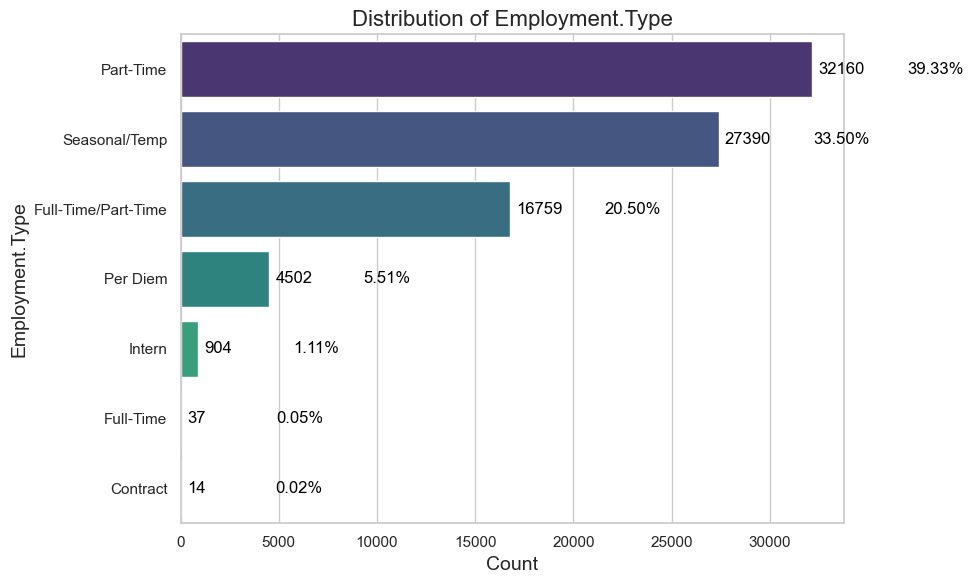

In [80]:
plot_categorical_distribution(combined_jobs, 'Employment.Type', top_n=10)

Most Employment_type is Part time

In [82]:
#Renaming columns

cols = ["Job.ID", "Position", "Company", "City", "State.Name", 
         "Education.Required", "Employment.Type", "Job.Description"]
combined_jobs = combined_jobs[cols].rename(columns={
    "Job.ID": "Job_ID",
    "State.Name": "State_Name",
    "Employment.Type": "Employment_Type",
    "Job.Description": "Job_Description",
    "Education.Required": "Education_Required"
})

combined_jobs.head()


,Job_ID,Position,Company,City,State_Name,Education_Required,Employment_Type,Job_Description
0,111,Server,Tacolicious,Palo Alto,California,Not Specified,Part-Time,Tacolicious' first Palo Alto store just opened...
1,113,Kitchen Staff/Chef,Claude Lane,San Francisco,California,Not Specified,Part-Time,\r\n\r\nNew French Brasserie in S.F. Financia...
2,117,Bartender,Machka Restaurants Corp.,San Francisco,California,Not Specified,Part-Time,We are a popular Mediterranean wine bar and re...
3,121,Server,Teriyaki House,Brisbane,California,Not Specified,Part-Time,● Serve food/drinks to customers in a profess...
4,127,Kitchen Staff/Chef,Rosa Mexicano - Sunset,Los Angeles,California,Not Specified,Part-Time,"Located at the heart of Hollywood, we are one ..."


***Text Preprocessing***

In [83]:
#Creating a function
def preprocess_text(text):
    """
    Preprocesses the text data by removing punctuation, digits, and special characters and extra spaces.
    
    """
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove digits
    text = text.translate(str.maketrans('', '', string.digits))
    
    # Remove special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    text = re.sub(r'\s+', ' ', text).strip()
    text = text.lower()
    
    return text

In [95]:
#Applying function to text data
combined_jobs['Job_Description'] = combined_jobs['Job_Description'].apply(preprocess_text)
combined_jobs['Job_Description'].head()

0    tacolicious first palo alto store just opened ...
1    new french brasserie in sf financial district ...
2    we are a popular mediterranean wine bar and re...
3    serve fooddrinks to customers in a professiona...
4    located at the heart of hollywood we are one o...
Name: Job_Description, dtype: object

In [86]:
combined_jobs['Position'] = combined_jobs['Position'].apply(preprocess_text)

In [87]:
combined_jobs['Position'].head()

0               server
1    kitchen staffchef
2            bartender
3               server
4    kitchen staffchef
Name: Position, dtype: object

#### ***Text Vectorization***


In [91]:
#Combining textual columns for TF-IDF
combined_jobs['combined_text'] = combined_jobs[['Position', 'Company', 'City', 'State_Name', 'Job_Description', 'Education_Required']].apply(lambda x: ' '.join(x.astype(str)), axis=1)

# Initializing TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=100)  # Adjust max_features as needed

#Fitting and transforming the 'combined_text' column
tfidf_matrix = tfidf.fit_transform(combined_jobs['combined_text'])

#Converting to DataFrame for better viewing
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Viewing the TF-IDF matrix
print(tfidf_df)

       ability  accounts       all        an       and       are        as  \
0          0.0  0.000000  0.000000  0.000000  0.102198  0.151824  0.146168   
1          0.0  0.000000  0.000000  0.263989  0.378154  0.374518  0.120189   
2          0.0  0.000000  0.000000  0.164878  0.314909  0.311881  0.150132   
3          0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.184539   
4          0.0  0.000000  0.000000  0.000000  0.000000  0.424470  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
81761      0.0  0.555725  0.169615  0.000000  0.000000  0.271330  0.130612   
81762      0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
81763      0.0  0.000000  0.000000  0.000000  0.581643  0.078552  0.075626   
81764      0.0  0.000000  0.211415  0.178790  0.113827  0.338197  0.162800   
81765      0.0  0.000000  0.000000  0.000000  0.253469  0.376548  0.000000   

       assigned  assistant        at  ...        up        we  

#### ***Modelling***

In [96]:
#Using Nearest Neighbors for Finding Similar Jobs
n_neighbors = 11  #similar 10 jobs plus job itself
nn = NearestNeighbors(n_neighbors=n_neighbors, metric='cosine')
nn.fit(tfidf_df)

# Trying out similar jobs for a given job index
job_index = 0
distances, indices = nn.kneighbors([tfidf_df.iloc[job_index]])
recommended_job_indices = indices[0][1:]

for i, rec_index in enumerate(recommended_job_indices, 1):
    job = combined_jobs.iloc[rec_index]
    print(f"Recommendation {i}:")
    print(f"Company: {job.get('Company', 'N/A')}")
    print(f"Location: {job.get('City', 'N/A')}, {job.get('State_Name', 'N/A')}")
    print(f"Employment Type: {job.get('Employment_Type', 'N/A')}")
    print("-" * 40)

#Creating a function to get job recommendations
def get_recommendations(job_index, tfidf_df, df, top_n=10):
    """
    Given a job_index, returns the top_n most similar jobs using cosine similarity.
    
    Parameters:
    - job_index: Index of the job in the DataFrame to base recommendations on
    - tfidf_df: DataFrame containing TF-IDF features for jobs
    - df: Original DataFrame with job details
    - top_n: Number of recommendations to return (default is 10)
    
    Returns:
    - top_n similar job listings
    """
    # Fitting  Nearest Neighbors on TF-IDF matrix again for recommendations
    nn = NearestNeighbors(n_neighbors=top_n + 1, metric='cosine')
    nn.fit(tfidf_df)
    
    # Getting similarity scores for the given job
    distances, indices = nn.kneighbors([tfidf_df.iloc[job_index]])
    recommended_indices = indices[0][1:]
    
    return df.iloc[recommended_indices][['Position', 'Company', 'City', 'State_Name', 'Employment_Type', 'Job_Description']]



Recommendation 1:
Company: Sushi Kai
Location: Milpitas, California
Employment Type: Part-Time
----------------------------------------
Recommendation 2:
Company: Ajisen Ramen
Location: San Mateo, California
Employment Type: Part-Time
----------------------------------------
Recommendation 3:
Company: Ajito Izakaya
Location: Cupertino, California
Employment Type: Part-Time
----------------------------------------
Recommendation 4:
Company: Luce
Location: San Francisco, California
Employment Type: Part-Time
----------------------------------------
Recommendation 5:
Company: La Mar CebicherÃ­a Peruana
Location: San Francisco, California
Employment Type: Part-Time
----------------------------------------
Recommendation 6:
Company: Sakae Sushi
Location: Burlingame, California
Employment Type: Part-Time
----------------------------------------
Recommendation 7:
Company: Luna Park - LA
Location: Los Angeles, California
Employment Type: Part-Time
----------------------------------------
Recom

c:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [97]:
# Trying out the function for confirmation
recommended_jobs = get_recommendations(job_index, tfidf_df, combined_jobs, top_n=10)

print("Top recommended jobs:")
print(recommended_jobs)

Top recommended jobs:
      Position                     Company           City  State_Name  \
84041   server                   Sushi Kai       Milpitas  California   
84073   server                Ajisen Ramen      San Mateo  California   
84016   server               Ajito Izakaya      Cupertino  California   
74233   server                        Luce  San Francisco  California   
69233   server  La Mar CebicherÃ­a Peruana  San Francisco  California   
54458   server                 Sakae Sushi     Burlingame  California   
62553   server              Luna Park - LA    Los Angeles  California   
84018   server       Sesame Korean Cuisine     Burlingame  California   
75234   server                    Piperade  San Francisco  California   
84003   server   Akane Japanese Restaurant      Los Altos  California   

      Employment_Type                                    Job_Description  
84041       Part-Time  we are located in milpitas if you are energeti...  
84073       Part-Time  a

c:\Users\FLEX 5\anaconda03\envs\learn-env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


***Saving the Model,Vectorizer and Matrix***

In [94]:
#Save the Vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

#Save the Nearest Neighbors Model
with open('nn_model.pkl', 'wb') as f:
    pickle.dump(nn, f)

#Save the TF-IDF Matrix
with open('tfidf_matrix.pkl', 'wb') as f:
    pickle.dump(tfidf_df, f)

#Save the Combined Jobs DataFrame to Csv File
combined_jobs.to_csv('combined_jobs.csv', index=False)

